# Group 18 Assignment 11 Aswin Lakshmanan Sriram (002877313) & Dhruv Soni (002822421)

### Q1. Find a simple dataset with a one-humped histogram and model it by matching with the pdfs we learned till today. Find the most likely parameters for your pdf using MOM. 

Steps to model the "WIND" data using the Method of Moments:

1. Load the data from the CSV file.
2. Explore the "WIND" data to understand its distribution.
3. Select a probability distribution that best fits the "WIND" data.
4. Estimate the parameters of the selected distribution using the Method of Moments.
5. Visualize the fitted distribution and compare it with the empirical data.

In [74]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("wind_dataset.csv")

# Display the first few rows of the dataframe to understand its structure
print(data.head())

# Explore the statistics of the "WIND" column
print(data["WIND"].describe())

         DATE   WIND  IND  RAIN  IND.1  T.MAX  IND.2  T.MIN  T.MIN.G
0  1961-01-01  13.67    0   0.2    0.0    9.5    0.0    3.7     -1.0
1  1961-01-02  11.50    0   5.1    0.0    7.2    0.0    4.2      1.1
2  1961-01-03  11.25    0   0.4    0.0    5.5    0.0    0.5     -0.5
3  1961-01-04   8.63    0   0.2    0.0    5.6    0.0    0.4     -3.2
4  1961-01-05  11.92    0  10.4    0.0    7.2    1.0   -1.5     -7.5
count    6574.000000
mean        9.796834
std         4.977272
min         0.000000
25%         6.000000
50%         9.210000
75%        12.960000
max        30.370000
Name: WIND, dtype: float64


In [75]:
# Assuming 'data' contains your 'wind' dataset
numerical_df = data.select_dtypes(include=[np.number])

# Replacing zero values with a small real number
numerical_df['WIND'].replace(0.0, 0.00001, inplace=True)

/var/folders/zw/vqcb9myx13lcyv937_rvmx2r0000gn/T/ipykernel_10373/2213782135.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical_df['WIND'].replace(0.0, 0.00001, inplace=True)


To visualize the histogram of the "WIND" dataset

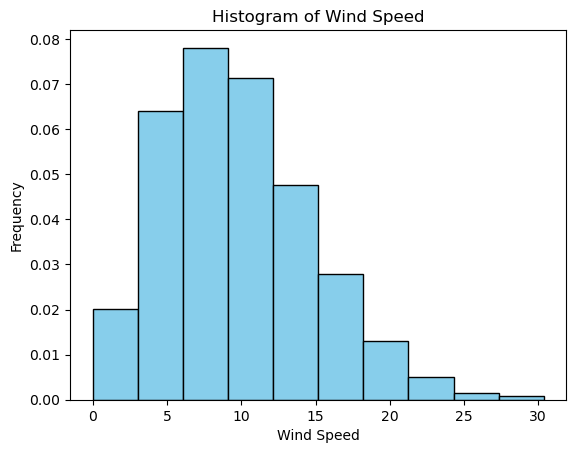

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("wind_dataset.csv")

# Plot the histogram of the "WIND" column
plt.hist(data["WIND"], density=True, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speed')

# Show plot
plt.show()

Based on the statistics provided, it appears that the wind data is continuous and positive-valued, with a mean of approximately 9.80 and a standard deviation of approximately 4.98.

Given these characteristics, we can consider several probability distributions for modeling the wind data, such as the Normal distribution, the Gamma distribution, or the Weibull distribution. Since the wind data is continuous and positively skewed, the Gamma or Weibull distributions may be more appropriate choices.

Let's proceed with using the Method of Moments (MOM) to estimate the parameters of the Gamma distribution for modeling the wind data. We'll follow these steps:

1. Calculate the sample mean and variance of the "WIND" data.
2. Equate the sample moments with the moments of the Gamma distribution.
3. Solve for the parameters of the Gamma distribution using MOM.

In [77]:
import numpy as np
import pandas as pd
from scipy.stats import gamma

# Load the data from the CSV file
data = pd.read_csv("wind_dataset.csv")

# Calculate sample mean and variance of the "WIND" data
sample_mean = data["WIND"].mean()
sample_variance = data["WIND"].var()

# MOM parameter estimation for Gamma distribution
alpha_mom = sample_mean**2 / sample_variance
beta_mom = sample_variance / sample_mean

# Print the estimated parameters
print("Estimated shape parameter (alpha) using MOM:", alpha_mom)
print("Estimated scale parameter (beta) using MOM:", beta_mom)

alpha_mom, beta_mom


Estimated shape parameter (alpha) using MOM: 3.8742597885305696
Estimated scale parameter (beta) using MOM: 2.528698392541044


(3.8742597885305696, 2.528698392541044)

This code will plot the empirical histogram of the "WIND" data and overlay the PDF of the fitted Gamma distribution using the estimated parameters obtained from MOM.

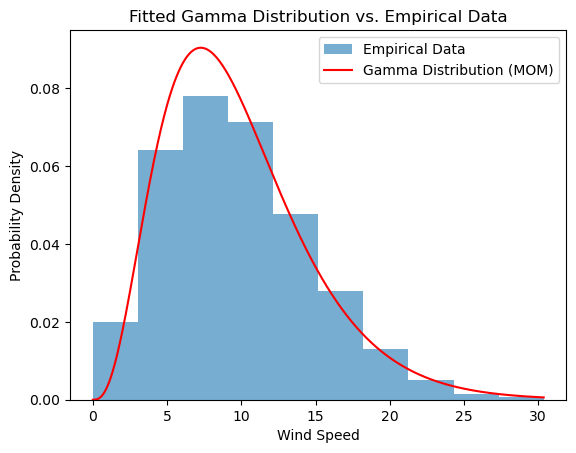

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Load the data from the CSV file
data = pd.read_csv("wind_dataset.csv")

# Calculate sample mean and variance of the "WIND" data
sample_mean = data["WIND"].mean()
sample_variance = data["WIND"].var()

# MOM parameter estimation for Gamma distribution
alpha_mom = sample_mean**2 / sample_variance
beta_mom = sample_variance / sample_mean

# Generate values for the x-axis
x = np.linspace(0, data["WIND"].max(), 1000)

# Plot empirical histogram
plt.hist(data["WIND"], bins=10, density=True, alpha=0.6, label='Empirical Data')

# Plot PDF of fitted Gamma distribution
plt.plot(x, gamma.pdf(x, alpha_mom, scale=beta_mom), 'r', label='Gamma Distribution (MOM)')

# Add labels and legend
plt.xlabel('Wind Speed')
plt.ylabel('Probability Density')
plt.title('Fitted Gamma Distribution vs. Empirical Data')
plt.legend()

# Show plot
plt.show()

### Q2. Build a generative model allowing you to actually roll your gaussian-loaded die and generate random variates. Then, generate 100 random variates from it. Plot their histogram. How close does it match the theoretical histogram? Evaluate the error.

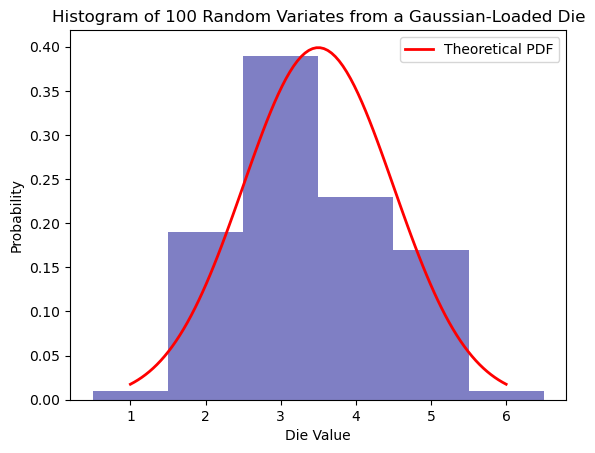

0.003185605568921026


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm

# Parameters for the Gaussian-loaded die
mean = 3.5  # The middle value of a 6-sided die
std_dev = 1.0  # Standard deviation - chosen to keep most of the probability within 1-6

# Generate 100 random variates using a Gaussian distribution with the specified mean and standard deviation
random_variates = np.random.normal(mean, std_dev, 100)

# Clip the variates to the range of a 6-sided die
clipped_variates = np.clip(random_variates, 1, 6)
rounded_variates = np.round(clipped_variates)

# Plot the histogram of generated variates
plt.hist(rounded_variates, bins=np.arange(1, 8) - 0.5, density=True, alpha=0.5, color='darkblue')
plt.title("Histogram of 100 Random Variates from a Gaussian-Loaded Die")
plt.xlabel("Die Value")
plt.ylabel("Probability")
plt.xticks(range(1, 7))

# For comparison, plot the theoretical probability density function (PDF) for the Gaussian distribution
x = np.linspace(1, 6, 100)
pdf = norm.pdf(x, mean, std_dev)

# Clip the PDF to the range of a 6-sided die
clipped_pdf = np.clip(pdf, 0, None)

plt.plot(x, clipped_pdf, 'r-', lw=2, label='Theoretical PDF')

plt.legend()
plt.show()

# Evaluate the error between the empirical distribution and the theoretical PDF
# Using a simple metric - mean squared error (MSE) between the empirical probabilities and theoretical probabilities
# First, calculate the empirical probabilities
empirical_probs, _ = np.histogram(rounded_variates, bins=np.arange(1, 8), density=True)

# Then, calculate theoretical probabilities for discrete outcomes (1 through 6)
theoretical_probs = [norm.cdf(i + 0.5, mean, std_dev) - norm.cdf(i - 0.5, mean, std_dev) for i in range(1, 7)]

# Calculate MSE
mse = np.mean((empirical_probs - theoretical_probs) ** 2)

print(mse)

### Q3. Find a simple dataset with a one-humped histogram and model it by matching with the pdfs we learned till today. Find the most likely parameters for your pdf using MLE. 

To model the "WIND" dataset by matching it with probability density functions (PDFs) and finding the most likely parameters using Maximum Likelihood Estimation (MLE), we can follow these steps:

1. Select candidate distributions: Based on the characteristics of the "WIND" data, we can consider distributions like the Gamma distribution, Weibull distribution, or Log-Normal distribution.

2. Estimate parameters using MLE: For each candidate distribution, estimate the parameters using MLE.

3. Visualize the fitted distribution: Plot the empirical histogram of the "WIND" data along with the PDF of the fitted distribution using the estimated parameters.



This code will fit the Gamma distribution to the "WIND" data using Maximum Likelihood Estimation (MLE). It will then visualize the fitted distribution and compare it with the empirical data. Finally, it will print the estimated parameters obtained from MLE. 

In [80]:
import numpy as np
import pandas as pd
from scipy.special import psi, polygamma
from scipy.optimize import newton
import warnings

Now we have to compute the best choice of alpha and beta factors for the best achievable fit. So we compute the log of gamma function to simplify taking derivatives (making use of log(axb)=log(a)+log(b)). After this, when we compute the first and second derivative of the above gamma function and equate to zero, we can maximize the value of alpha and beta.

The python implementation of the first and second derivative are as written below

In [81]:
numerical_df = data.select_dtypes(include=[np.number])

# Replacing zero values with a small real number
numerical_df['WIND'].replace(0.0, 0.00001, inplace=True)

# Calculate statistics
log_mean = numerical_df.mean().apply(np.log)
mean_log = numerical_df.apply(np.log).mean()

# Replace zero values in log_mean and mean_log to prevent encountering nan values during computation
log_mean.replace(-np.inf, np.log(0.00001), inplace=True)
mean_log.replace(-np.inf, np.log(0.00001), inplace=True)

# Define functions for MLE estimation
# The first derivative calculated using the psi function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
# The second derivative calculated using the polygamma function
dl2gamma = lambda m, *args: 1. / m - polygamma(1, m)

# Suppress runtime warnings during optimization
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Calculate optimized alpha value with a different initial guess
alpha_optimized = newton(dlgamma, 2, dl2gamma, args=(log_mean['WIND'], mean_log['WIND']))

# Remove the suppression of runtime warnings
warnings.filterwarnings("default", category=RuntimeWarning)

alpha_optimized

/var/folders/zw/vqcb9myx13lcyv937_rvmx2r0000gn/T/ipykernel_10373/1759536712.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical_df['WIND'].replace(0.0, 0.00001, inplace=True)


3.4284060668776593

In [82]:
# Lets compute optimized beta value using the alpha computed above
beta_optimized = alpha_optimized/data['WIND'].mean()
beta_optimized

0.34995039132664296

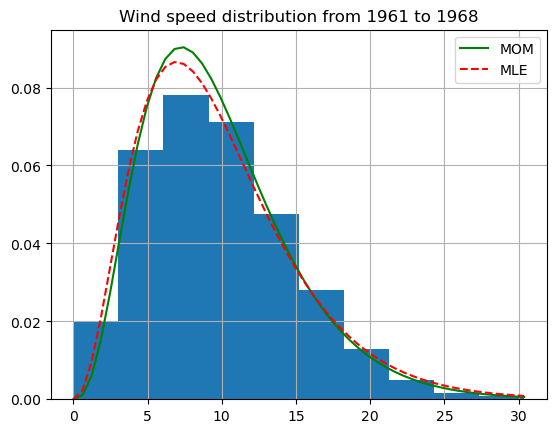

In [83]:
# Now lets plot the distributions calculated using MOM and MLE. Let's compare them with one plot
import matplotlib.pyplot as plt
%matplotlib inline

data['WIND'].hist(density=True, bins=10)
x = np.linspace(data['WIND'].min(), data['WIND'].max()) 

plt.plot(x, gamma.pdf(x, a=alpha_mom, scale=beta_mom), 'g-', label='MOM')
plt.plot(x, gamma.pdf(x, a=alpha_optimized, scale=1/beta_optimized), 'r--', label='MLE')
plt.title('Wind speed distribution from 1961 to 1968')
plt.legend(loc='upper right')
plt.show()

We can see that the fit just got better with MLE optimization.
The above graph shows the range of wind speeds along the x-axis while the y-axis has the pdf of their frequencies.